In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=500, precision=1, suppress=True, floatmode='fixed')

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Preprocess

# Normalize input vectors
# [0, 255] --> [0.0, 1.0]
X_train = x_train / 255
X_test = x_test / 255

# Encode target outputs using one-hot encoding
Y_train = tf.one_hot(y_train, 10)
Y_test = tf.one_hot(y_test, 10)

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-10-16 11:44:20.600379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-16 11:44:20.600496: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Define a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu',
        kernel_regularizer=tf.keras.regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [5]:
# Train the model
batch_size = 1024
history = model.fit(X_train, Y_train, epochs=200, batch_size=batch_size, shuffle=True, validation_split=0.3)

Epoch 1/200


2022-10-16 11:44:20.971533: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-16 11:44:21.259675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - ETA: 0s - loss: 1.9484 - accuracy: 0.3938

2022-10-16 11:44:23.241381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - 3s 29ms/step - loss: 1.9484 - accuracy: 0.3938 - val_loss: 1.5668 - val_accuracy: 0.6907
Epoch 2/200
42/42 [==============================] - 1s 23ms/step - loss: 1.0660 - accuracy: 0.6713 - val_loss: 1.0919 - val_accuracy: 0.8109
Epoch 3/200
42/42 [==============================] - 1s 22ms/step - loss: 0.8322 - accuracy: 0.7522 - val_loss: 0.7663 - val_accuracy: 0.8570
Epoch 4/200
42/42 [==============================] - 1s 22ms/step - loss: 0.7049 - accuracy: 0.7946 - val_loss: 0.5672 - val_accuracy: 0.8820
Epoch 5/200
42/42 [==============================] - 1s 21ms/step - loss: 0.6217 - accuracy: 0.8217 - val_loss: 0.4574 - val_accuracy: 0.8952
Epoch 6/200
42/42 [==============================] - 1s 21ms/step - loss: 0.5707 - accuracy: 0.8373 - val_loss: 0.3879 - val_accuracy: 0.9049
Epoch 7/200
42/42 [==============================] - 1s 21ms/step - loss: 0.5290 - accuracy: 0.8498 - val_loss: 0.3483 - val_accuracy: 0.9117
Epoch 8/200
42/42 

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

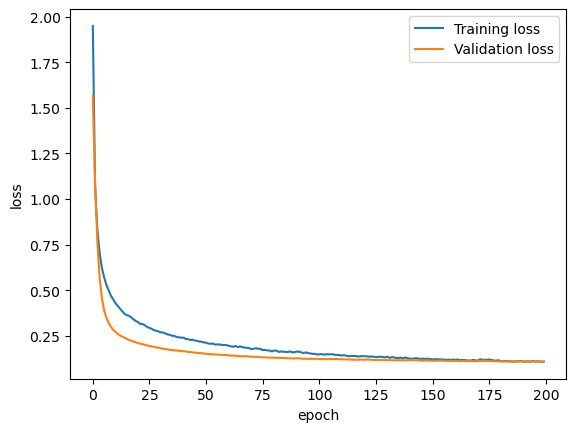

In [7]:
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
# plt.show()
plt.savefig('sgd_regularizer_dropout_bn.pdf', bbox_inches='tight')

In [8]:
train_loss, train_acc = model.evaluate(X_train, Y_train, batch_size=batch_size)
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=batch_size)

10/10 [==============================] - 0s 12ms/step - loss: 0.0988 - accuracy: 0.9778


In [9]:
print(f"Training accuracy = {train_acc:.4f}")
print(f"Test accuracy     = {test_acc:.4f}")

Training accuracy = 0.9884
Test accuracy     = 0.9778
